# 1. Multi-class and Multi-Label Classication Using Support Vector Machines

## (a) Choose 70% of the data randomly as the training set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
#import dataset
dataset = pd.read_csv("Frogs_MFCCs.csv")
dataset_x = dataset.iloc[:,:22]
dataset_y = dataset.iloc[:,22:-1]

In [9]:
#split dataset into training and test
train_x, test_x, train_y, test_y = train_test_split(dataset_x, dataset_y, test_size=0.3, random_state=30)
#reindex
train_x = train_x.sort_index().reset_index(drop=True)
train_y = train_y.sort_index().reset_index(drop=True)

test_x = test_x.sort_index().reset_index(drop=True)
test_y = test_y.sort_index().reset_index(drop=True)

## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

    Exact matches: the instances that are correctly classified in each labels
    
    Hamming score: the number of extract matches samples/ total number of samples.
    
    Hamming loss:Hamming loss: the fraction of the wrong labels to the total number of labels. This is a loss function, so the optimal value is zero. Hamming Loss =1- Hamming score

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [10]:
#standardize data
scaler= StandardScaler()
scaler.fit(dataset_x)
standard_train_x = pd.DataFrame(scaler.transform(train_x))
standard_test_x = pd.DataFrame(scaler.transform(test_x))

In [11]:
#split one y set into three to solve the multi-class and nulti-label problem
train_y1, train_y2, train_y3 = train_y["Family"], train_y["Genus"], train_y["Species"]
test_y1, test_y2, test_y3 = test_y['Family'], test_y['Genus'], test_y['Species']

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#range of the weight of the SVM penalty and the width of the Gaussian Kernel
param = {'C':np.logspace(-3,6,10),'gamma':np.linspace(.1,2,20)}

In [20]:
svc = SVC(kernel='rbf', random_state=1)
#build model for each label
clf1 = GridSearchCV(svc, param, cv=10)
clf1.fit(standard_train_x, train_y1)
print('one finished.')

clf2 = GridSearchCV(svc, param, cv=10)
clf2.fit(standard_train_x, train_y2)
print('two filished')

clf3 = GridSearchCV(svc, param, cv=10)
clf3.fit(standard_train_x, train_y3)
print('three finished')

one finished.
two filished
three finished


In [44]:
## Get the best parameters for each models
C1, gamma1 = clf1.best_params_['C'], clf1.best_params_['gamma']
C2, gamma2 = clf2.best_params_['C'], clf2.best_params_['gamma']
C3, gamma3 = clf3.best_params_['C'], clf3.best_params_['gamma']

print("the best parameters of model1: ",C1, gamma1)
print("the best parameters of model2: ",C2, gamma2)
print("the best parameters of model3: ",C3, gamma3)

the best parameters of model1:  1.0 0.1
the best parameters of model2:  10.0 0.1
the best parameters of model3:  10.0 0.1


In [61]:
## Refit the models with the parameters
svc1 = SVC(C=C1, gamma=gamma1, kernel='rbf', random_state=1).fit(standard_train_x, train_y1)
svc2 = SVC(C=C2, gamma=gamma2, kernel='rbf', random_state=1).fit(standard_train_x, train_y2)
svc3 = SVC(C=C3, gamma=gamma3, kernel='rbf', random_state=1).fit(standard_train_x, train_y3)

In [62]:
## Predict with the models
test_predict_y1 = pd.Series(svc1.predict(standard_test_x))
test_predict_y2 = pd.Series(svc2.predict(standard_test_x))
test_predict_y3 = pd.Series(svc3.predict(standard_test_x))

#contact three results
test_predict_y = pd.concat([test_predict_y1, test_predict_y2, test_predict_y3], axis=1)

In [216]:
from sklearn.metrics import hamming_loss
hamming_loss_Family =hamming_loss(test_predict_y1, test_y1)
hamming_score_Family = 1- hamming_loss_Family
hamming_loss_Genus =hamming_loss(test_predict_y2, test_y2)
hamming_score_Genus = 1- hamming_loss_Genus
hamming_loss_Species =hamming_loss(test_predict_y3, test_y3)
hamming_score_Species = 1- hamming_loss_Species
print("hamming loss of Family : ", round(hamming_loss_Family ,4))
print("hamming score of Family : ", round(hamming_score_Family ,4),"\n")
print("hamming loss of Genus  : ", round(hamming_loss_Genus ,4))
print("hamming score of Genus  : ", round(hamming_score_Genus ,4),"\n")
print("hamming loss of Species: ", round(hamming_loss_Species ,4))
print("hamming score of Species: ", round(hamming_score_Species ,4),"\n")

hamming loss of Family :  0.0111
hamming score of Family :  0.9889 

hamming loss of Genus  :  0.012
hamming score of Genus  :  0.988 

hamming loss of Species:  0.0148
hamming score of Species:  0.9852 



In [182]:
def hamming_score_multilabel(predict_y, true_y):
    predict_y = predict_y.sort_index().reset_index(drop=True)
    true_y = true_y.sort_index().reset_index(drop=True)
    total_instance = predict_y.shape[0]
    exact_match = 0
    for i, row in enumerate(predict_y.iterrows()):
        if predict_y.loc[i].tolist() == true_y.loc[i].tolist(): 
            exact_match += 1
    return exact_match/total_instance

In [217]:
test_hamming_score = hamming_score_multilabel(test_predict_y,test_y)
test_hamming_loss =1- test_hamming_score
print("total test hamming score is : ", round(test_hamming_score,4))
print("total test hamming loss is : ", round(test_hamming_loss,4))

total test hamming score is :  0.9819
total test hamming loss is :  0.0181


### iii. Repeat 1(b)ii with L1-penalized SVM Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [65]:
from sklearn.svm import LinearSVC

In [80]:
param = {'C':np.logspace(-3,6,10)}
linear_svc_l1 = LinearSVC(penalty='l1', dual=False, random_state=1)

In [81]:
#build model for each label
Linear_clf1 = GridSearchCV(linear_svc_l1, param, cv=10)
Linear_clf1.fit(standard_train_x, train_y1)
print('one finished.')

Linear_clf2 = GridSearchCV(linear_svc_l1, param, cv=10)
Linear_clf2.fit(standard_train_x, train_y2)
print('two filished')

Linear_clf3 = GridSearchCV(linear_svc_l1, param, cv=10)
Linear_clf3.fit(standard_train_x, train_y3)
print('three finished')

one finished.
two filished
three finished


In [82]:
C1 = Linear_clf1.best_params_['C']
C2 = Linear_clf2.best_params_['C']
C3 = Linear_clf3.best_params_['C']

print("the best C of model1: ",C1)
print("the best C of model2: ",C2)
print("the best C of model3: ",C3)

the best C of model1:  0.1
the best C of model2:  100.0
the best C of model3:  1.0


In [83]:
Linear_svc1 = LinearSVC(penalty='l1', dual=False, C= C1, random_state=1).fit(standard_train_x, train_y1)
Linear_svc2 = LinearSVC(penalty='l1', dual=False, C= C2, random_state=1).fit(standard_train_x, train_y2)
Linear_svc3 = LinearSVC(penalty='l1', dual=False, C= C3, random_state=1).fit(standard_train_x, train_y3)

In [84]:
## Predict with the models
Linear_test_predict_y1 = pd.Series(Linear_svc1.predict(standard_test_x))
Linear_test_predict_y2 = pd.Series(Linear_svc2.predict(standard_test_x))
Linear_test_predict_y3 = pd.Series(Linear_svc3.predict(standard_test_x))

#contact three results
Linear_test_predict_y = pd.concat([Linear_test_predict_y1, Linear_test_predict_y2, Linear_test_predict_y3], axis=1)

In [218]:
hamming_loss_Family =hamming_loss(Linear_test_predict_y1, test_y1)
hamming_score_Family = 1- hamming_loss_Family
hamming_loss_Genus =hamming_loss(Linear_test_predict_y2, test_y2)
hamming_score_Genus = 1- hamming_loss_Genus
hamming_loss_Species =hamming_loss(Linear_test_predict_y3, test_y3)
hamming_score_Species = 1- hamming_loss_Species
print("hamming loss of Family : ", round(hamming_loss_Family ,4))
print("hamming score of Family : ", round(hamming_score_Family ,4),"\n")
print("hamming loss of Genus  : ", round(hamming_loss_Genus ,4))
print("hamming score of Genus  : ", round(hamming_score_Genus ,4),"\n")
print("hamming loss of Species: ", round(hamming_loss_Species ,4))
print("hamming score of Species: ", round(hamming_score_Species ,4),"\n")

hamming loss of Family :  0.0699
hamming score of Family :  0.9301 

hamming loss of Genus  :  0.0491
hamming score of Genus  :  0.9509 

hamming loss of Species:  0.0431
hamming score of Species:  0.9569 



In [219]:
Linear_test_hamming_score = hamming_score_multilabel(Linear_test_predict_y,test_y)
Linear_test_hamming_loss = 1-Linear_test_hamming_score
print("total test hamming score of LinearSVC is : ", round(Linear_test_hamming_score,4))
print("total test hamming loss of LinearSVC is : ", round(Linear_test_hamming_loss,4))

total test hamming score of LinearSVC is :  0.9097
total test hamming loss of LinearSVC is :  0.0903


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
smote_train_x1, smote_train_y1 = sm.fit_resample(standard_train_x, train_y1)
smote_train_x2, smote_train_y2 = sm.fit_resample(standard_train_x, train_y2)
smote_train_x3, smote_train_y3 = sm.fit_resample(standard_train_x, train_y3)

smote_train_x1, smote_train_x2, smote_train_x3 = pd.DataFrame(smote_train_x1), pd.DataFrame(smote_train_x2), pd.DataFrame(smote_train_x3)
smote_train_y1, smote_train_y2, smote_train_y3 = pd.Series(smote_train_y1), pd.Series(smote_train_y2), pd.Series(smote_train_y3)

In [87]:
param = {'C':np.logspace(-3,6,10)}
linear_svc_l1 = LinearSVC(penalty='l1', dual=False, random_state=1)

In [95]:
#build model for each label
smote_clf1 = GridSearchCV(linear_svc_l1, param, cv=10)
smote_clf1.fit(smote_train_x1, smote_train_y1)
print('one finished.')

smote_clf2 = GridSearchCV(linear_svc_l1, param, cv=10)
smote_clf2.fit(smote_train_x2, smote_train_y2)
print('two filished')

smote_clf3 = GridSearchCV(linear_svc_l1, param, cv=10)
smote_clf3.fit(smote_train_x3, smote_train_y3)
print('three finished')

one finished.
two filished
three finished


In [96]:
C1 = smote_clf1.best_params_['C']
C2 = smote_clf2.best_params_['C']
C3 = smote_clf3.best_params_['C']

print("the best C of model1: ",C1)
print("the best C of model2: ",C2)
print("the best C of model3: ",C3)

the best C of model1:  10.0
the best C of model2:  100.0
the best C of model3:  100.0


In [97]:
smote_svc1 = LinearSVC(penalty='l1', dual=False, C= C1, random_state=1).fit(smote_train_x1, smote_train_y1)
smote_svc2 = LinearSVC(penalty='l1', dual=False, C= C2, random_state=1).fit(smote_train_x2, smote_train_y2)
smote_svc3 = LinearSVC(penalty='l1', dual=False, C= C3, random_state=1).fit(smote_train_x3, smote_train_y3)

In [98]:
## Predict with the models
smote_test_predict_y1 = pd.Series(smote_svc1.predict(standard_test_x))
smote_test_predict_y2 = pd.Series(smote_svc2.predict(standard_test_x))
smote_test_predict_y3 = pd.Series(smote_svc3.predict(standard_test_x))

#contact three results
smote_test_predict_y = pd.concat([smote_test_predict_y1, smote_test_predict_y2, smote_test_predict_y3], axis=1)

In [214]:
hamming_loss_Family =hamming_loss(smote_test_predict_y1, test_y1)
hamming_score_Family = 1- hamming_loss_Family
hamming_loss_Genus =hamming_loss(smote_test_predict_y2, test_y2)
hamming_score_Genus = 1- hamming_loss_Genus
hamming_loss_Species =hamming_loss(smote_test_predict_y3, test_y3)
hamming_score_Species = 1- hamming_loss_Species
print("hamming loss of Family : ", round(hamming_loss_Family ,4))
print("hamming score of Family : ", round(hamming_score_Family ,4),"\n")
print("hamming loss of Genus  : ", round(hamming_loss_Genus ,4))
print("hamming score of Genus  : ", round(hamming_score_Genus ,4),"\n")
print("hamming loss of Species: ", round(hamming_loss_Species ,4))
print("hamming score of Species: ", round(hamming_score_Species ,4),"\n")

hamming loss of Family :  0.0764
hamming score of Family :  0.9236 

hamming loss of Genus  :  0.0857
hamming score of Genus  :  0.9143 

hamming loss of Species:  0.0426
hamming score of Species:  0.9574 



In [213]:
smote_test_hamming_score = hamming_score_multilabel(smote_test_predict_y,test_y)
smote_test_hamming_loss = 1-smote_test_hamming_score
print("total test hamming score of LinearSVC after SMOTE is : ", round(smote_test_hamming_score,4))
print("total test hamming loss of LinearSVC after SMOTE is : ", round(smote_test_hamming_loss,4))

total test hamming score of LinearSVC after SMOTE is :  0.8648
total test hamming loss of LinearSVC after SMOTE is :  0.1352


     Conclusion: After doing SMOTE for training dataset, the hamming loss of each label increase, the total test hamming score is worse than the result before doing up-sample.

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

## Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

## (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [222]:
def KMeans_silhouette_score(data_x, k):
    kmeans_model = KMeans(n_clusters=k).fit(data_x)
    labels = kmeans_model.labels_
    return silhouette_score(data_x, labels, metric="euclidean")

In [223]:
dataset_x = dataset.iloc[:,:22]
dataset_x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [224]:
max_pair=[0,0]
#decide the best k
for k in range(2, 51):
    if KMeans_silhouette_score(dataset_x, k)>max_pair[1]:
        max_pair=[k, KMeans_silhouette_score(dataset_x, k)]
print("Based on silhouette score, the best k is :  ", max_pair[0])

Based on silhouette score, the best k is :   4


## (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [225]:
#using the best k
best_k = max_pair[0]

#refit the kmeans model
kmeans_model = KMeans(n_clusters=best_k).fit(dataset_x)
labels = pd.Series(kmeans_model.labels_)

In [226]:
cluster_dict={}
#store index of each cluster
for cluster in range(4):
    cluster_index= labels.index[labels==cluster].tolist()
    cluster_dict[cluster]=cluster_index

In [227]:
#split whole target dataset into three parts
dataset_y1, dataset_y2, dataset_y3= dataset_y["Family"], dataset_y["Genus"], dataset_y["Species"]
#store major class in a dict to use in next question
major_triple = {}
for cluster in range(4):
    major_family = dataset_y1[cluster_dict[cluster]].value_counts().index[0]
    major_Genus = dataset_y2[cluster_dict[cluster]].value_counts().index[0]
    major_Species = dataset_y3[cluster_dict[cluster]].value_counts().index[0]
    major_triple[cluster]=[major_family, major_Genus, major_Species]
    
    print("The major family of cluster",cluster, " is  :", major_family)
    print("The major Genus of cluster",cluster, " is   :", major_Genus)
    print("The major Species of cluster",cluster, " is :", major_Species)
    print("\n\n")

The major family of cluster 0  is  : Leptodactylidae
The major Genus of cluster 0  is   : Adenomera
The major Species of cluster 0  is : AdenomeraHylaedactylus



The major family of cluster 1  is  : Hylidae
The major Genus of cluster 1  is   : Hypsiboas
The major Species of cluster 1  is : HypsiboasCordobae



The major family of cluster 2  is  : Hylidae
The major Genus of cluster 2  is   : Hypsiboas
The major Species of cluster 2  is : HypsiboasCinerascens



The major family of cluster 3  is  : Dendrobatidae
The major Genus of cluster 3  is   : Ameerega
The major Species of cluster 3  is : Ameeregatrivittata





## (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

    Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

In [228]:
# a mothod to calculate hamming dustance
def calculate_hamming_distance(predict_y, true_y):
    predict_y = predict_y.sort_index().reset_index(drop=True)
    true_y = true_y.sort_index().reset_index(drop=True)
    total_instance = predict_y.shape[0]
    exact_match = 0
    for i, row in enumerate(predict_y.iterrows()):
        if predict_y.loc[i].tolist() == true_y.loc[i].tolist(): 
            exact_match += 1
    return total_instance - exact_match

In [229]:
predict_y = pd.DataFrame(columns=dataset_y.columns,index=dataset_y.index)
for cluster in range(4):
    for index in cluster_dict[cluster]:
        predict_y.loc[index] = major_triple[cluster]
    #calculate total distance,score, loss of all clusters
hamming_distance, hamming_score, hamming_loss=0, 0, 0
for cluster in range(4):
    hamming_distance += calculate_hamming_distance(predict_y.loc[cluster_dict[cluster]], 
                                                       dataset_y.loc[cluster_dict[cluster]])
    hamming_score +=  hamming_score_multilabel(predict_y.loc[cluster_dict[cluster]], 
                                                   dataset_y.loc[cluster_dict[cluster]])
    hamming_loss += 1-hamming_score_multilabel(predict_y.loc[cluster_dict[cluster]], 
                                                   dataset_y.loc[cluster_dict[cluster]])

print("The average hamming distance is : ", hamming_distance/4)
print("The average hamming score is : ", round(hamming_score/4,4))
print("The average hamming loss is : ", round(hamming_loss/4,4))

The average hamming distance is :  439.75
The average hamming score is :  0.6765
The average hamming loss is :  0.3235


### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate

In [204]:
# a mothod to calculate hamming dustance
def calculate_hamming_distance(predict_y, true_y):
    total_instance = predict_y.shape[0]
    exact_match = 0
    for i, row in enumerate(predict_y.iterrows()):
        if predict_y.loc[i].tolist() == true_y.loc[i].tolist(): 
            exact_match += 1
    return total_instance - exact_match
# calculate three parameters
def cal_all_parameters(data_x, data_y):
    #refit the kmeans model
    kmeans_model = KMeans(n_clusters=best_k).fit(dataset_x)
    labels = pd.Series(kmeans_model.labels_)
    
    cluster_dict={}
    #store index of each cluster
    for cluster in range(4):
        cluster_index= labels.index[labels==cluster].tolist()
        cluster_dict[cluster]=cluster_index
        
    #split whole target dataset into three parts
    dataset_y1, dataset_y2, dataset_y3= dataset_y["Family"], dataset_y["Genus"], dataset_y["Species"]
    #store major class in a dict to use in next question
    major_triple = {}
    for cluster in range(4):
        major_family = dataset_y1[cluster_dict[cluster]].value_counts().index[0]
        major_Genus = dataset_y2[cluster_dict[cluster]].value_counts().index[0]
        major_Species = dataset_y3[cluster_dict[cluster]].value_counts().index[0]
        major_triple[cluster]=[major_family, major_Genus, major_Species]
    
    #rebuild a predict y
    predict_y = pd.DataFrame(columns=dataset_y.columns,index=dataset_y.index)
    for cluster in range(4):
        for index in cluster_dict[cluster]:
            predict_y.loc[index] = major_triple[cluster]
    #calculate total distance,score, loss of all clusters
    hamming_distance = calculate_hamming_distance(predict_y, dataset_y)
    hamming_score =  hamming_score_multilabel(predict_y, dataset_y)
    hamming_loss = 1-hamming_score
    #return average parameters
    return [hamming_distance, hamming_score, hamming_loss]

In [220]:
distance, score, loss = list(), list(), list()
# Monte-Carlo Simulation
for i in range(50):
    if i==25:
        print("complete 50%")
    if i==49:
        print("complete 100%")
    results = cal_all_parameters(dataset_x, dataset_y)
    #transfer average distance, score to total distance, score
    hamming_distance = results[0]
    hamming_score = results[1]
    hamming_loss = results[2]
    #store in a list
    distance.append(hamming_distance)
    score.append(hamming_score)
    loss.append(hamming_loss)

complete 50%
complete 100%


In [231]:
#result after preforming 50 times
print("Average hamming distance : ", (np.array(distance).mean()))
print("Standard deviation of hamming distance : ", round(np.array(distance).std(),4),"\n")
print("Average hamming score : ", round(np.array(score).mean(),4))
print("Standard deviation of hamming score : ", round(np.array(score).std(),4),"\n")
print("Average hamming score : ", round(np.array(loss).mean(),4))
print("Standard deviation of hamming score : ", round(np.array(loss).std(),4))

Average hamming distance :  1774.76
Standard deviation of hamming distance :  55.1567 

Average hamming score :  0.7533
Standard deviation of hamming score :  0.0077 

Average hamming score :  0.2467
Standard deviation of hamming score :  0.0077


# 3. ISLR 10.7.2

Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by

| a      | b |c|d|
| ----------- | ----------- |----------- |----------- |
| null| 0.3 | 0.4 | 0.7 |
| 0.3 |null | 0.5 | 0.8 |
| 0.4 | 0.5 |null | 0.45|
| 0.7 | 0.8 | 0.45|null |

For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.

    (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

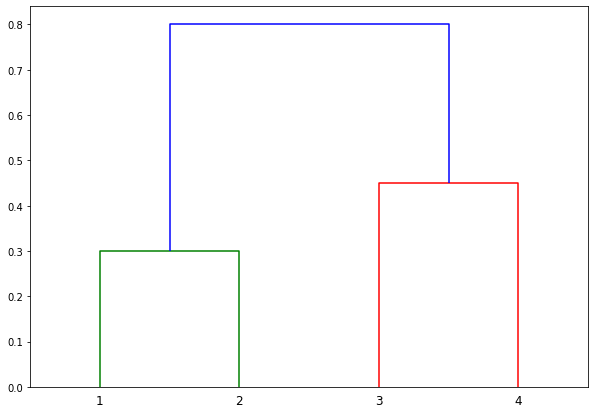

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform
X= np.array([[0,0.3,0.4,0.7],[0.3,0,0.5,0.8],[0.4,0.5,0,0.45],[0.7,0.8,0.45,0]])
dist = squareform(X)
linked = linkage(dist, 'complete')
labelList = [1,2,3,4]
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.show()

    (b) Repeat (a), this time using single linkage clustering.

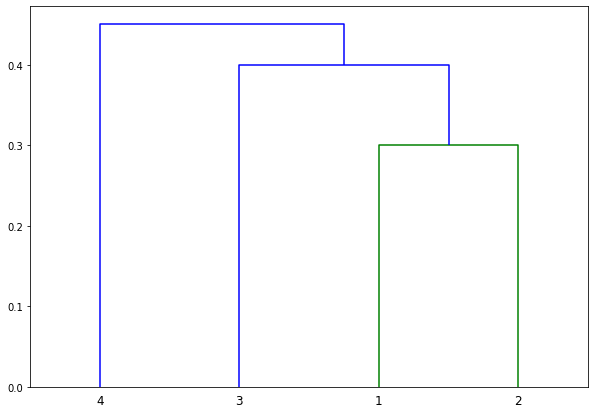

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform
X= np.array([[0,0.3,0.4,0.7],[0.3,0,0.5,0.8],[0.4,0.5,0,0.45],[0.7,0.8,0.45,0]])
dist = squareform(X)
linked = linkage(dist, 'single')
labelList = [1,2,3,4]
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.show()

    (c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

    answer: If we use complete linkage, we will have culster (1,2) and (3,4)

    (d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

    answer: If we use single linkage, we will have culster ((1,2),3) and (4)

    (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

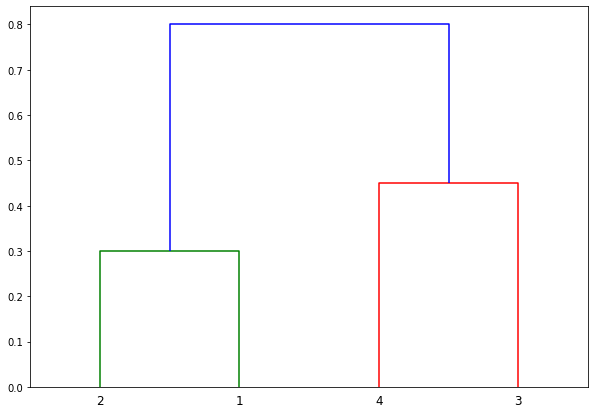

In [209]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform
X= np.array([[0,0.3,0.4,0.7],[0.3,0,0.5,0.8],[0.4,0.5,0,0.45],[0.7,0.8,0.45,0]])
dist = squareform(X)
linked = linkage(dist, 'complete')
labelList = [2, 1, 4, 3]
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.show()